# How much water does it take to make electricity?

>Water, as we know, is a really important resource. Given that we are already straining our water resources, some states already are planning for their water shortages. It would be good to understand the impact of power generation on water. As electricity can be generated in different ways, let's explore the best ways to generate electricity with respect to water usage. 

>Department of Energy published the following water consumption and withdrawl [data](https://catalog.data.gov/dataset/operational-water-consumption-and-withdrawal-factors-for-electricity-generating-technologi) for different electricity generators. Looking into the dataset we understand that there is a difference between consumption and withdrawl of water. In essence, if the power plant uses water from a river for a process and pumps that water back, it is called withdrawl. But if the water is converted into steam, and not returned to the water source it's called consumption. 


In [1]:
import pandas as pd
df = pd.read_csv(r'./summarywaterfactorsopenei.csv')
df.head()


,Source,Fuel,Prime Mover,Cooling System,Notes,Median Value,Unit
0,NETL 2010a,Coal,IGCC,Recirculating,NaN,360,gal/MWh
1,NETL 2010a,Coal,IGCC,Recirculating,NaN,330,gal/MWh
2,NETL 2010a,Coal,IGCC,Recirculating,NaN,318,gal/MWh
3,NETL 2007b,Coal,IGCC,Recirculating,NaN,372,gal/MWh
4,NETL 2007b,Coal,IGCC,Recirculating,NaN,390,gal/MWh


In [5]:
waterConsumption = df.groupby(by=['Fuel']).mean()
waterConsumption = waterConsumption.sort_values(by=['Median Value'], ascending=False)
waterConsumption.columns =['Water gal/MWh']
waterConsumption.to_csv('./WaterConsumptionPerSource.csv')
waterConsumption.to_html('./waterconsumption.html')
waterConsumption

,Water gal/MWh
Fuel,
Nuclear,536.333333
CSP,531.214286
Coal,462.732143
Biopower,438.875000
Natural Gas,321.100000
Geothermal,232.888889
PV,2.000000
Wind,0.000000


In [10]:
def tablecss(s):
    css = """
        table {
    width: 60%;
    border-collapse: collapse;
}

table,th,td {
border: 1px solid black;
}
th {
    height: 30%;

}
tr:nth-child(even) {background-color: #f2f2f2;}
th, td {
    padding: 3%;
    text-align: center;
}
        """
    return css

In [11]:
waterConsumption.to_html('./waterconsumption.html')
#terConsumption.style.apply(tablecss).render()

ValueError: Function <function tablecss at 0x7f272462cd90> returned the wrong shape.
Result has shape: (1,)
Expected shape:   (8, 1)

In [3]:
    waterConsumption.plot(kind='Bar')

In [4]:
energyPro = pd.read_csv(r'./TotalEnergyGenerationUSA2017.csv')
energyPro

,Fuel,Energy Billion kWh
0,Nuclear,805
1,CSP,3
2,Coal,1208
3,Biopower,64
4,Natural Gas,1273
5,Wind,254
6,Geothermal,16
7,PV,50


In [45]:
energyPro.columns = ['Fuel','Energy in Billion kWh']
energyPro.set_index(keys=['Fuel'])
totalWater = waterConsumption.merge(energyPro,on='Fuel')
totalWater.head()
totalWater['TotalWater Consumed Billion-Gallons'] = totalWater['Water gal/MWh']*totalWater['Energy in Billion kWh']/1000 # dividing by 1000 for MW
totalWater = totalWater.sort_values(by='TotalWater Consumed Billion-Gallons', ascending=False)
totalWater.to_csv('./totalWaterConsumedbyEnergySource.csv')

totalWater

,Fuel,Water gal/MWh,Energy in Billion kWh,TotalWater Consumed Billion-Gallons
2,Coal,462.732143,1208,558.980429
0,Nuclear,536.333333,805,431.748333
4,Natural Gas,321.100000,1273,408.760300
3,Biopower,438.875000,64,28.088000
5,Geothermal,232.888889,16,3.726222
1,CSP,531.214286,3,1.593643
6,PV,2.000000,50,0.100000
7,Wind,0.000000,254,0.000000


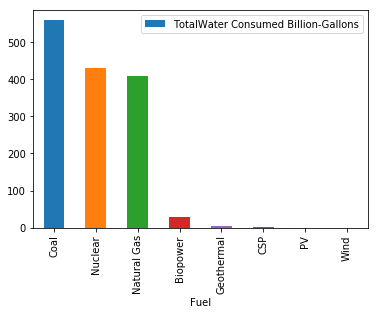

In [40]:
totalWater.plot.bar(x='Fuel',y = 'TotalWater Consumed Billion-Gallons')


    Above is the total water consumption per year for each energy resource

> Nuclear power plants, coal power plants, and natural gas power plants withdraw and consume water. The large white smoke emanating from the big stacks of a nuclear plant is actually steam. It is a example of consumption. Water is converted into steam and steam is used to generate electricity. Fossil fuels also use water for withdrawl and consumption. This water is used for cooling different internal processes. Warm waters used in withdrawl can cause algal blooms. 

> We understand that renewable energy is good for the environment, but one advantage that does not get enough attention is water usage. Though some renewable power plants consume water, like concentrated solar power, they represent a very small portion of renewables installed. Wind power does not consume any water.

 

In [47]:
df[df['Fuel']=='CSP'].groupby(['Fuel','Cooling System']).mean().to_csv('./CSP_water.csv')
df[df['Fuel']=='CSP'].groupby(['Fuel','Cooling System']).mean()

Median Value
Fuel Cooling System              
CSP  Dry                68.333333
     Hybrid            225.600000
     Recirculating     884.956522

>Water consumption is primarily dependent on the cooling system. It is evident in terms of concentrated solar power (CSP). If the cooling system is dry, CSP only consumes about 70 gallons/MWh of energy produced--but if the cooling system is recirculating, it consumes a lot of water. Given that the power generated from CSP in the United States is very small (~1700MW currently installed), this is not a big footprint. The key thing to note is that there are technologies which can use very little water in terms of CSP. 

In [42]:
df[df['Fuel']=='Nuclear'].groupby(['Fuel','Cooling System']).mean()

Median Value
Fuel    Cooling System              
Nuclear Once-through          259.25
        Pond                  610.00
        Recirculating         696.50

    Compared to CSP, nuclear power produces 20% of the electricity in United States--around 805 Billion kWh of power. To produce that electricity, nuclear power might have consumed 431 billion gallons of water. This should be considered when we look into choosing nuclear power to generate zero carbon electricity.On average 10,000 US families use a billion gallons of water, so nuclear power uses the water of almost 4.3 million families.   
    
    Nuclear power also generates nuclear waste. The nuclear industry needs to be more transperant about the radio active waste it generates. Should we be worried about the water usage and nuclear waste? What are the long-term plans to save nuclear waste? They need to let everyone know why we shouldn't be worried about the water usage and nuclear waste--and the long term plans to save nuclear waste.   

In [43]:
nucelarwater = .805*536
nucelarwater

431.48

In [44]:
df[df['Fuel']=='Coal'].groupby(['Fuel','Cooling System']).mean()

Median Value
Fuel Cooling System              
Coal Once-through      158.272727
     Pond              440.000000
     Recirculating     558.162162

    Compared to nuclear and coal, wind power is one of the fastest growing industries. Currently 6.3% of energy for the United States comes from wind energy. Unlike nuclear and coal, wind energy doesn't consume any water to produce electricity. This is a good thing. Wind farms are installed in agriculatural land, and wind power builds on the revenue for the land owners. Wind power does not compete with current agriculture in terms of water usage. These two factors have made wind power popular in the Great Plains region. 

    Solar PV does not consume water either. The very minimal amount of water consumed by solar pv  about 2 gallon/MWh in some solar power plants could be for cleaning panels. The industry is moving away from using this to other methods which don't required water. 
    It is clear that not all zero carbon energy is the same. Each one has it's own advantages and disadvantages. Nuclear is not a golden answer to our zero carbon future. Neither is just solar or just wind. Our energy mix needs to be both sustainable as well as zero carbon. 